In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

from LDA import LDA
from LogisticRegression import LogisticRegression
from LinearRegression import LinearRegression
from QDA import QDA

In [2]:
DATA_PATH = './data_HW1/' #replace by path of the folder that contains the sets

In [3]:
def plots_classifiers(clf, data_name): 
    f, axes = plt.subplots(1, 2, figsize = (10, 6))
    for j, type_data in enumerate(["train", "test"]):
        data = np.loadtxt(DATA_PATH+data_name+'.'+type_data)    
        X = data[:, 0:2]
        y = data[:, 2]
        
        # Fit the classifier when we load the training
        if type_data == "train":
            clf.fit(X, y)
                
        x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = 0.05
        x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
        X_mesh = np.vstack((x1_mesh.ravel(), x2_mesh.ravel())).T
            
        Z = clf.predict(X_mesh).reshape(x1_mesh.shape)
        axes[j].contourf(x1_mesh, x2_mesh, Z, colors = ('red', 'blue'),
                            levels = [-1,0,1], alpha = 0.3)

        axes[j].scatter(X[:, 0], X[:, 1], c=y, s =10, marker='x')
        axes[j].axis([x1_min, x1_max, x2_min, x2_max])
        
        axes[j].legend(loc='upper center', bbox_to_anchor=(-0.05, -0.05),
                    fancybox=True, shadow=True, ncol=1, fontsize = 'xx-large',
                    markerscale = 2)
        axes[j].set_title(type_data+' data')

                    
    f.tight_layout();
    
#misclassification measurements

def get_score(clf, data_name):
    scores = {"train" : 0, "test":0}
    for type_data in ["train", "test"]:
        data = np.loadtxt(DATA_PATH+data_name+'.'+type_data)    
        X = data[:, 0:2]
        y = data[:, 2]
        
        # Fit the classifier when we load the training
        if type_data == "train":
            clf.fit(X, y)
        scores[type_data] = round(100*(1-accuracy_score(y, clf.predict(X))),2)
    return scores
    

C:\Users\Mhamed\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


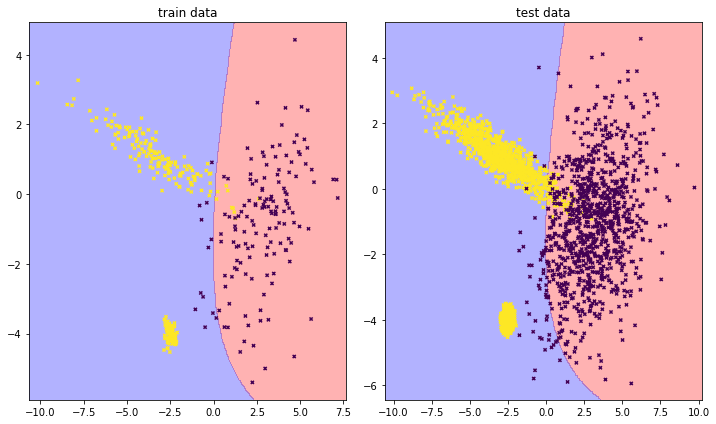

In [4]:
clf1 = LDA()
clf2 = LogisticRegression()
clf3 = LinearRegression()
clf4 = QDA()
plots_classifiers(clf4,'classificationC')
# plots_classifiers(clf,'classificationB')
# plots_classifiers(clf,'classificationC')

In [5]:
for data in ['classificationA','classificationB','classificationC']:
    print('\n'+'Scores for each classifier applied to '+data ) 
    print('------------------------------------------')
    for (model,clf) in zip(['LDA','LogReg','LinReg','QDA'],[clf1,clf2,clf3,clf4]) : 
        print(model,get_score(clf,data))


Scores for each classifier applied to classificationA
------------------------------------------
LDA {'train': 1.3300000000000001, 'test': 2.0}
LogReg {'train': 0.0, 'test': 3.3999999999999999}
LinReg {'train': 1.3300000000000001, 'test': 2.0699999999999998}
QDA {'train': 0.67000000000000004, 'test': 2.0}

Scores for each classifier applied to classificationB
------------------------------------------
LDA {'train': 3.0, 'test': 4.1500000000000004}
LogReg {'train': 2.0, 'test': 4.2999999999999998}
LinReg {'train': 3.0, 'test': 4.1500000000000004}
QDA {'train': 1.3300000000000001, 'test': 2.0}

Scores for each classifier applied to classificationC
------------------------------------------
LDA {'train': 5.5, 'test': 4.2300000000000004}
LogReg {'train': 4.0, 'test': 2.27}
LinReg {'train': 5.5, 'test': 4.2300000000000004}
QDA {'train': 5.25, 'test': 3.8300000000000001}


## Covariance Matrices for X

In [18]:
print('Distance between covariance matrix of x|y=1 and x|y=0 for : \n') 
for dataname in ['classificationA','classificationB','classificationC']:
    data = np.loadtxt(DATA_PATH+dataname+'.train')    
    X = data[:, 0:2]
    y = data[:, 2]
    print(dataname+': ', np.linalg.norm(np.cov(X[y==0][:,0],X[y==0][:,1])-np.cov(X[y==1][:,0],X[y==1][:,1])),'\n')

#Assumpetion of LDA model holds perfectly in the case of the first dataset.

Distance between covariance matrix of x|y=1 and x|y=0 for : 

classificationA:  0.584090168565 

classificationB:  4.51211435811 

classificationC:  5.61935771971 



** Assumption for same covariance matrix across classes approximately holds for dataset A but not for the others **

## Normality tests

In [19]:
print('p-values for normality tests: \n') 
for dataname in ['classificationA','classificationB','classificationC']:
    data = np.loadtxt(DATA_PATH+dataname+'.train')    
    X = data[:, 0:2]
    y = data[:, 2]
    print('\n'+dataname+':\n' +'-----------------------------------')
    print('x | y=0 :', normaltest(X[y==1])[0])
    print('x | y=1 :', normaltest(X[y==1])[1])

p-values for normality tests: 


classificationA:
-----------------------------------
x | y=0 : [ 0.39524624  0.54025164]
x | y=1 : [ 0.82067909  0.76328345]

classificationB:
-----------------------------------
x | y=0 : [ 6.83432655  6.61162836]
x | y=1 : [ 0.03280536  0.03666934]

classificationC:
-----------------------------------
x | y=0 : [ 34.07193391   3.07604811]
x | y=1 : [  3.99368271e-08   2.14805126e-01]


**Gaussian assumption always holds, except for x|y=1 in dataset C.**